In [158]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

## First look on data

In [130]:
#data_path = os.path.join(os.getcwd(), 'scraped_data', 'SHIB-WETH', 'SHIB-WETH_2023-03-24_07-21-05.csv')
data_path = r'd:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\scraped_data\HEX-WETH\HEX-WETH_2023-03-31_07-34-14.csv'
df = pd.read_csv(data_path)
#df = df_concatenated

In [131]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4756 entries, 2023-04-03 06:49:59 to 2023-03-16 04:42:23
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   buy_order      4756 non-null   bool   
 1   price_USD      4756 non-null   float64
 2   price_native   4756 non-null   float64
 3   amount_token   4756 non-null   float64
 4   total_native   4756 non-null   float64
 5   maker          4756 non-null   object 
 6   etherscan_url  4756 non-null   object 
dtypes: bool(1), float64(4), object(2)
memory usage: 264.7+ KB


,buy_order,price_USD,price_native,amount_token,total_native,maker,etherscan_url
datetime,,,,,,,
2023-04-03 06:49:59,True,0.000011,6.013000e-10,1046745.0,0.006200,0xaf...fcc1,https://etherscan.io/tx/0x1262c81abc9852dcae38...
2023-04-03 05:55:47,True,0.000011,6.012000e-10,13056928.0,0.078500,0x24...8a09,https://etherscan.io/tx/0xb278ff8bfcad4450aef6...
2023-04-03 05:54:11,True,0.000011,6.011000e-10,164884.0,0.000099,0xe3...3221,https://etherscan.io/tx/0xc5a22f606ecbdbc7eccd...
2023-04-03 05:24:59,True,0.000011,6.010000e-10,9278652.0,0.055700,0x26...c8ea,https://etherscan.io/tx/0x5ba48b8741bf0030c1a1...
2023-04-03 05:17:35,True,0.000011,6.009000e-10,164950.0,0.000099,0x94...b790,https://etherscan.io/tx/0x507183c1fc34b1214a18...
...,...,...,...,...,...,...,...
2023-03-16 04:48:35,False,0.000010,6.243000e-10,7489716.0,0.046700,0xf9...f76c,https://etherscan.io/tx/0x1938b99d7206420e0453...
2023-03-16 04:44:35,False,0.000010,6.246000e-10,17009610.0,0.106200,0xbd...8137,https://etherscan.io/tx/0xee46de1f49a752d616e3...
2023-03-16 04:42:47,False,0.000010,6.260000e-10,133253185.0,0.834200,0x76...7d5e,https://etherscan.io/tx/0x61032abd4996081aec1e...


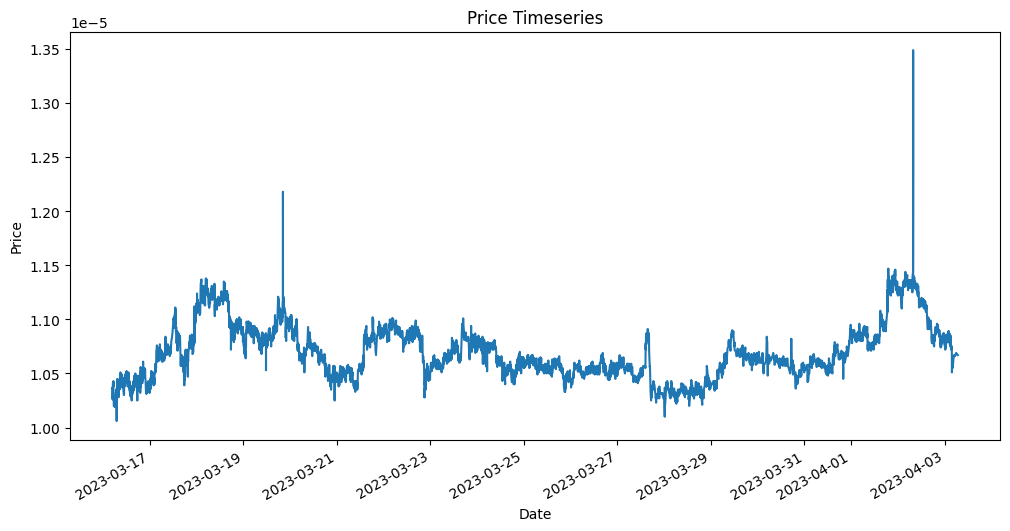

In [133]:
# Plot the price timeseries
df['price_native'].plot(figsize=(12, 6))
plt.title('Price Timeseries')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [138]:
df['returns'] = df['price_native'].pct_change()
df['log_returns'] = np.log(df['price_native']) - np.log(df['price_native'].shift(1))

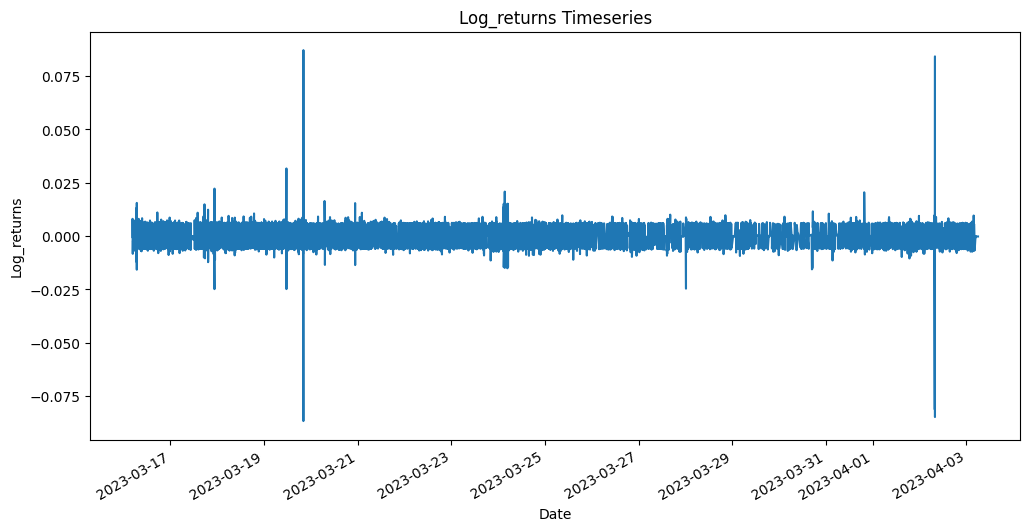

In [139]:
# Plot the price timeseries
df['log_returns'].plot(figsize=(12, 6))
plt.title('Log_returns Timeseries')
plt.xlabel('Date')
plt.ylabel('Log_returns')
plt.show()

In [141]:
df.log_returns.describe()

count    4755.000000
mean        0.000010
std         0.005385
min        -0.086670
25%        -0.002897
50%         0.000000
75%         0.002408
max         0.087162
Name: log_returns, dtype: float64

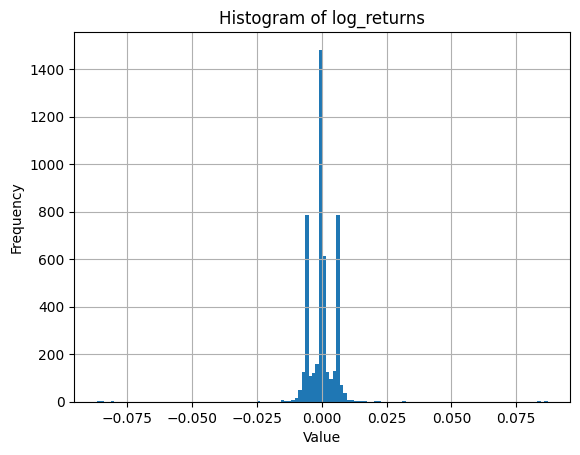

In [143]:
df['log_returns'].hist(bins = 130)

# add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of log_returns')

# display the plot
plt.show() #so far it seems quite ok, hopefully more data will result into something better

In [34]:
print(df['log_returns'].min())
q = df['log_returns'].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
print(q)
print(df['log_returns'].max())


-0.05447039726205549
0.01   -0.010750
0.05   -0.006795
0.25   -0.002579
0.50   -0.000549
0.75    0.001746
0.95    0.007378
0.99    0.012138
Name: log_returns, dtype: float64
0.05372919895758521


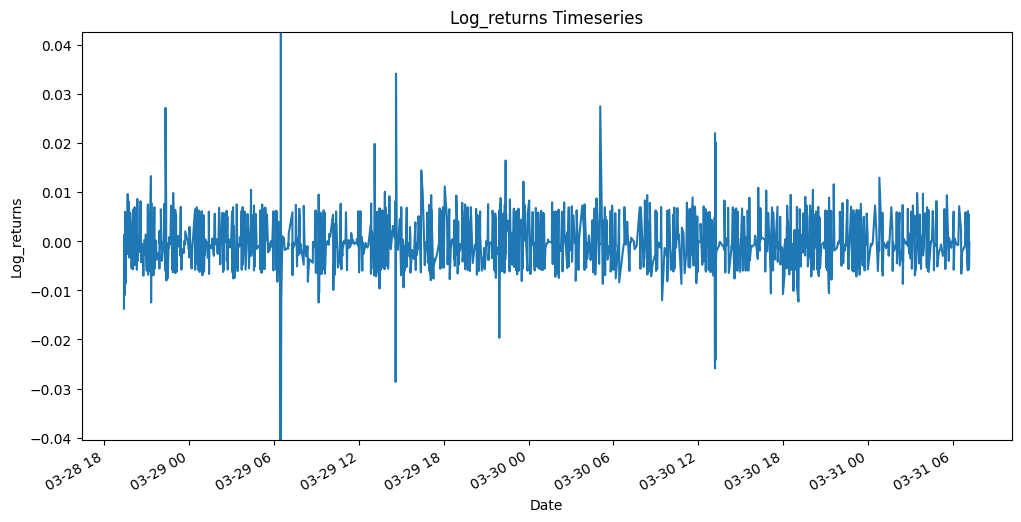

In [35]:
## Doing to plot returns with outliers cropped

# set the lower and upper percentile range for the y-axis
lower_percentile = 0.001
upper_percentile = 0.999

# calculate the lower and upper percentile values of column B
lower_value = df['log_returns'].quantile(lower_percentile)
upper_value = df['log_returns'].quantile(upper_percentile)

# Plot the price timeseries
df['log_returns'].plot(figsize=(12, 6))
plt.ylim(lower_value, upper_value)
plt.title('Log_returns Timeseries')
plt.xlabel('Date')
plt.ylabel('Log_returns')
plt.show()


## Concattanating separate dataframes - deprecated, already done in separate script

In [2]:
#list of pairs, copiyng for names of files
pair_list = [
            ("SHIB-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x811beed0119b4afce20d2583eb608c6f7af1954f", 50),
            ("HEX-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x55d5c232d921b9eaa6b37b5845e439acd04b4dba", 100),
            ("AGIX-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0xe45b4a84e0ad24b8617a489d743c52b84b7acebe", 40),
            ("OPTIMUS-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x8de7a9540e0edb617d78ca5a7c6cc18295fd8bb9", 70),
            ("SHIK-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x0b9f5cef1ee41f8cccaa8c3b4c922ab406c980cc", 60),
            ("INJ-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x1bdcebca3b93af70b58c41272aea2231754b23ca", 60),
            ("VOLT-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x487bfe79c55ac32785c66774b597699e092d0cd9", 200),
            ("MBOX-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x8fa59693458289914db0097f5f366d771b7a7c3f", 90),
            ("FLOKI-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x231d9e7181e8479a8b40930961e93e7ed798542c", 180),
            ("BabyDoge-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0xc736ca3d9b1e90af4230bd8f9626528b3d4e0ee0", 180)
            ]

In [125]:
#function that loads all vsc file from a folder and connects them to 1 file

def load_csv_files(folder_path):
    df_dict = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            name = os.path.splitext(file_name)[0]
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path).drop_duplicates().reset_index()
            df_dict[name] = df
    return df_dict

In [126]:
folder_path = "D:/Dokumenty/Vejška/Magisterské studium/DIPLOMKA/Code_and_Data/Data_scraping/DEX_data_scraper/scraped_data/SHIB-WETH"
df_dict = load_csv_files(folder_path)

In [127]:
def concatenate_dataframes(df_dict):
    # Concatenate DataFrames
    df_list = list(df_dict.values())
    df_concatenated = pd.concat(df_list, axis=0)

    # Ensure datetime column is sorted
    df_concatenated.sort_values(by=["datetime", "index"], ascending=[False, True], inplace=True)
    df_concatenated.drop(columns=['index'], inplace=True)
    df_concatenated.drop_duplicates(inplace=True)

    return df_concatenated

In [128]:
df_concatenated = concatenate_dataframes(df_dict)

In [129]:
df_concatenated

,datetime,buy_order,price_USD,price_native,amount_token,total_native,maker,etherscan_url
0,2023-04-03 06:49:59,True,0.000011,6.013000e-10,1046745.0,0.006200,0xaf...fcc1,https://etherscan.io/tx/0x1262c81abc9852dcae38...
1,2023-04-03 05:55:47,True,0.000011,6.012000e-10,13056928.0,0.078500,0x24...8a09,https://etherscan.io/tx/0xb278ff8bfcad4450aef6...
2,2023-04-03 05:54:11,True,0.000011,6.011000e-10,164884.0,0.000099,0xe3...3221,https://etherscan.io/tx/0xc5a22f606ecbdbc7eccd...
3,2023-04-03 05:24:59,True,0.000011,6.010000e-10,9278652.0,0.055700,0x26...c8ea,https://etherscan.io/tx/0x5ba48b8741bf0030c1a1...
4,2023-04-03 05:17:35,True,0.000011,6.009000e-10,164950.0,0.000099,0x94...b790,https://etherscan.io/tx/0x507183c1fc34b1214a18...
...,...,...,...,...,...,...,...,...
1500,2023-03-16 04:48:35,False,0.000010,6.243000e-10,7489716.0,0.046700,0xf9...f76c,https://etherscan.io/tx/0x1938b99d7206420e0453...
1501,2023-03-16 04:44:35,False,0.000010,6.246000e-10,17009610.0,0.106200,0xbd...8137,https://etherscan.io/tx/0xee46de1f49a752d616e3...
1502,2023-03-16 04:42:47,False,0.000010,6.260000e-10,133253185.0,0.834200,0x76...7d5e,https://etherscan.io/tx/0x61032abd4996081aec1e...
1503,2023-03-16 04:42:35,True,0.000010,6.311000e-10,720337.0,0.004500,0xbc...e87f,https://etherscan.io/tx/0x710c4bdc3ec6772dea12...


## First look on all the data at once

### Doing basic plots for all 10 datasets

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pair_list = [
            ("SHIB-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x811beed0119b4afce20d2583eb608c6f7af1954f", 50),
            ("HEX-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x55d5c232d921b9eaa6b37b5845e439acd04b4dba", 100),
            ("AGIX-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0xe45b4a84e0ad24b8617a489d743c52b84b7acebe", 40),
            ("OPTIMUS-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x8de7a9540e0edb617d78ca5a7c6cc18295fd8bb9", 70),
            ("SHIK-WETH", "https://www.dextools.io/app/en/ether/pair-explorer/0x0b9f5cef1ee41f8cccaa8c3b4c922ab406c980cc", 60),
            ("INJ-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x1bdcebca3b93af70b58c41272aea2231754b23ca", 60),
            ("VOLT-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x487bfe79c55ac32785c66774b597699e092d0cd9", 200),
            ("MBOX-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x8fa59693458289914db0097f5f366d771b7a7c3f", 90),
            ("FLOKI-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0x231d9e7181e8479a8b40930961e93e7ed798542c", 180),
            ("BabyDoge-WBNB", "https://www.dextools.io/app/en/bnb/pair-explorer/0xc736ca3d9b1e90af4230bd8f9626528b3d4e0ee0", 180)
            ]

In [23]:
import pandas as pd

def load_csv_to_df(file_path, verbose=False, name=""):
    # Load CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # If verbose mode is enabled, print the dataset name, number of rows, and some datetime information
    if verbose:
        #print(name)
        print("Number of rows:", len(df))
        print("Last datetime:", df.datetime.iloc[-2], )  # Assuming there is a "datetime" column in the DataFrame
        print("First datetime:", df.datetime.iloc[0])
        print("Time difference (in days):", datetime.strptime(df.datetime.iloc[0], '%Y-%m-%d %H:%M:%S') - datetime.strptime(df.datetime.iloc[-5], '%Y-%m-%d %H:%M:%S'))
        print()
    
    # Return the DataFrame
    return df

def set_index(df, info=False):
    # Convert 'datetime' column to datetime type and set it as the index
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace=True)
    
    if info:
        # Print some information about the resulting DataFrame
        df.info()

In [27]:
#plotting functions
#deprecated version
def plot_price(df, native=True, name=""):
    # Choose the column to plot based on native argument
    if native:
        price_column = 'price_native'
        column_name = 'Price (native currency)'
    else:
        price_column = 'price_USD'
        column_name = 'Price (USD)'
    
    # Plot the chosen column as a timeseries
    df[price_column].plot(figsize=(12, 6))
    
    # Set the title, axis labels, and show the plot
    plt.title(f'{name} {column_name} Timeseries')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.show()

In [32]:
#deprecated version
def plot_price(df, native=True, name="", ax=None):
    # Choose the column to plot based on native argument
    if native:
        price_column = 'price_native'
        column_name = 'Price (native currency)'
    else:
        price_column = 'price_USD'
        column_name = 'Price (USD)'
    
    # Plot the chosen column as a timeseries
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    df[price_column].plot(ax=ax)
    
    # Set the title, axis labels
    ax.set_title(f'{name} {column_name} Timeseries')
    ax.set_xlabel('Date')
    ax.set_ylabel(column_name)

In [49]:
#current version
def plot_price(df, native=True, name="", ax=None, plot_both=False):
    # Choose the column to plot based on native argument
    if native:
        price_column = 'price_native'
        column_name = 'Price (native currency)'
    else:
        price_column = 'price_USD'
        column_name = 'Price (USD)'
    
    # Plot the chosen column as a timeseries
    if ax is None and not plot_both:
        fig, ax = plt.subplots(figsize=(12, 6))

    if not plot_both:
        df[price_column].plot(ax=ax)
    
        # Set the title, axis labels
        ax.set_title(f'{name} {column_name} Timeseries')
        ax.set_xlabel('Date')
        ax.set_ylabel(column_name)
    
    # Optionally plot both timeseries side by side
    if plot_both:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
        plot_price(df, native=True, name=name, ax=ax1, plot_both=False)
        plot_price(df, native=False, name=name, ax=ax2, plot_both=False)
        plt.show()

SHIB-WETH


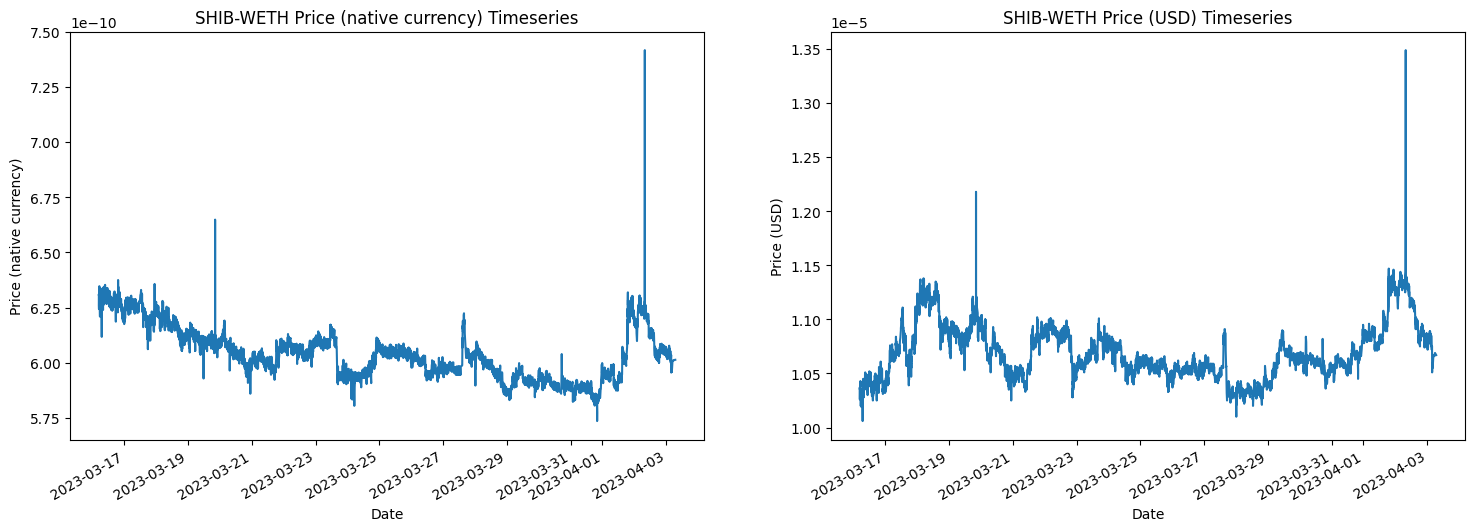

HEX-WETH


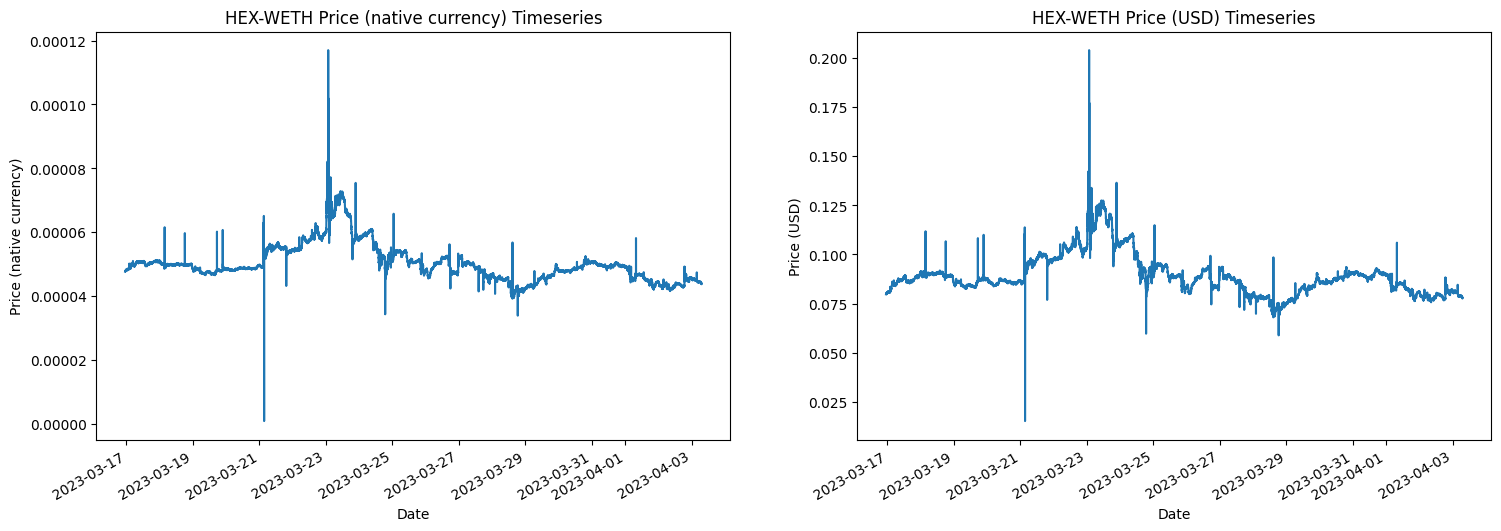

AGIX-WETH


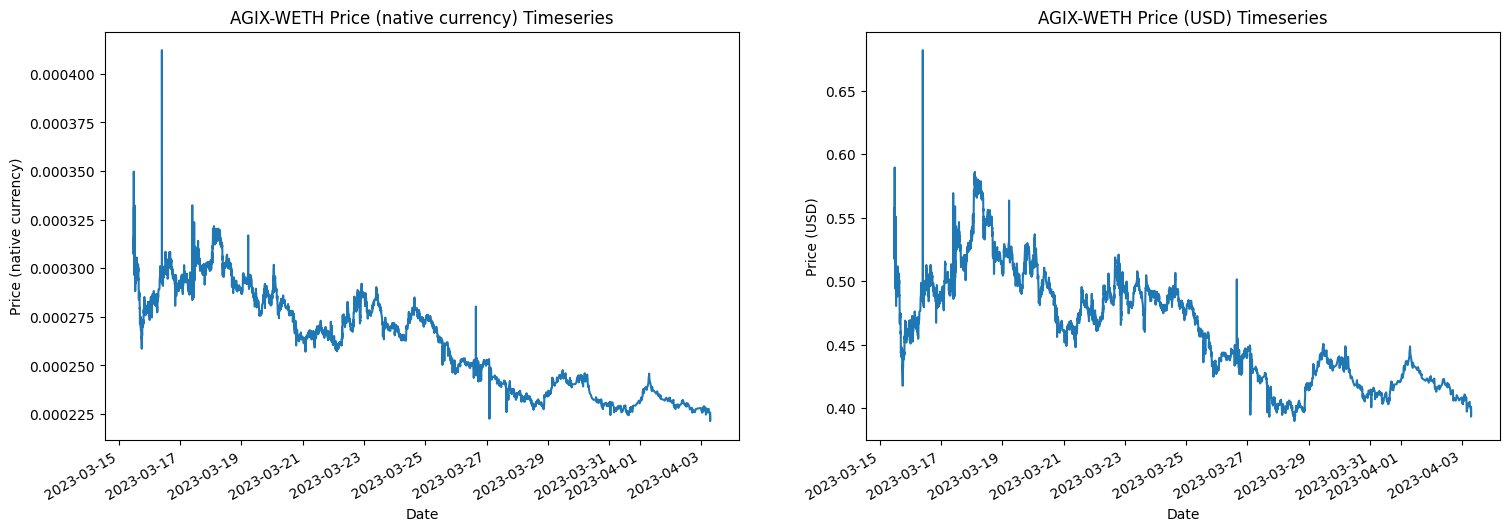

OPTIMUS-WETH


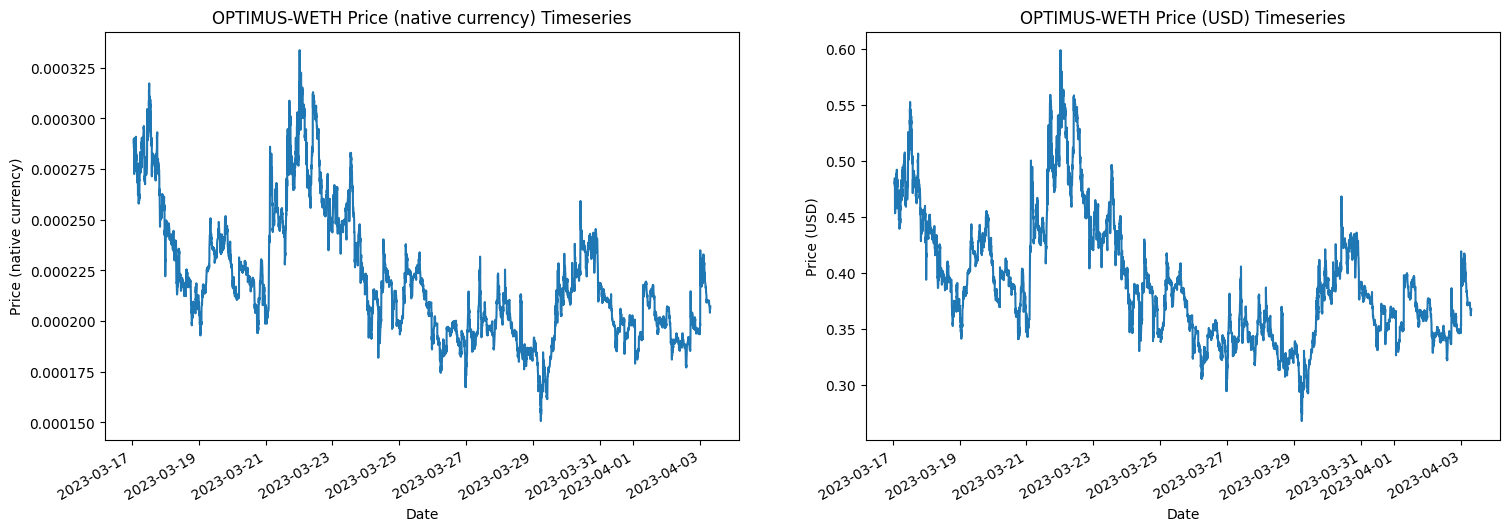

SHIK-WETH


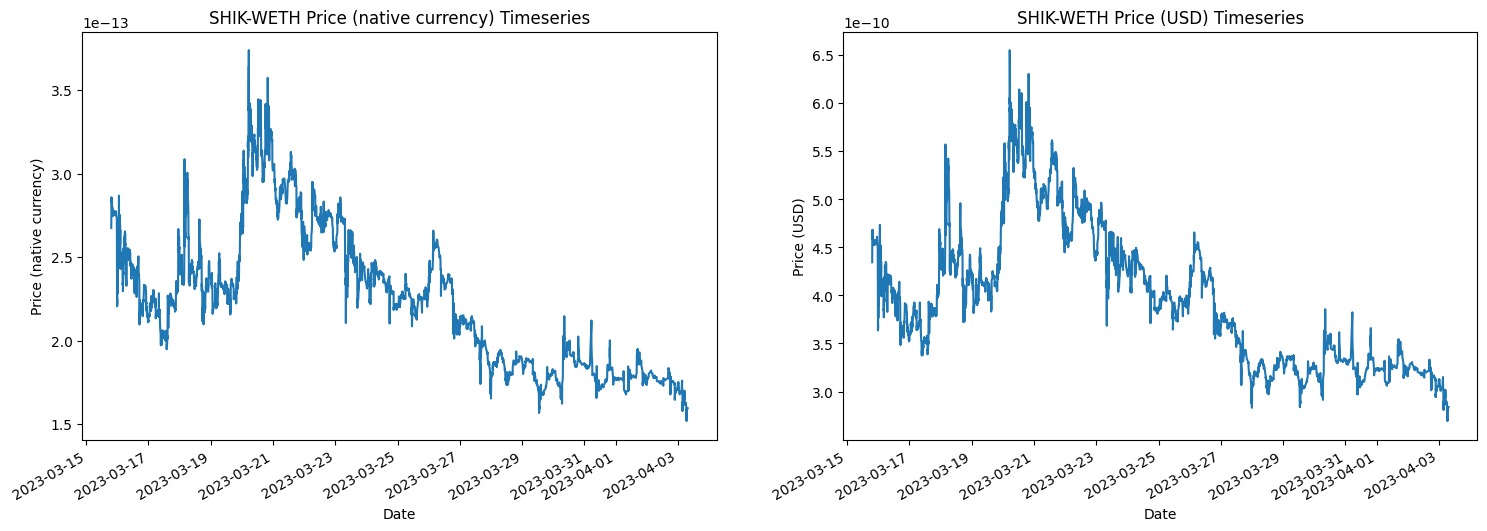

INJ-WBNB


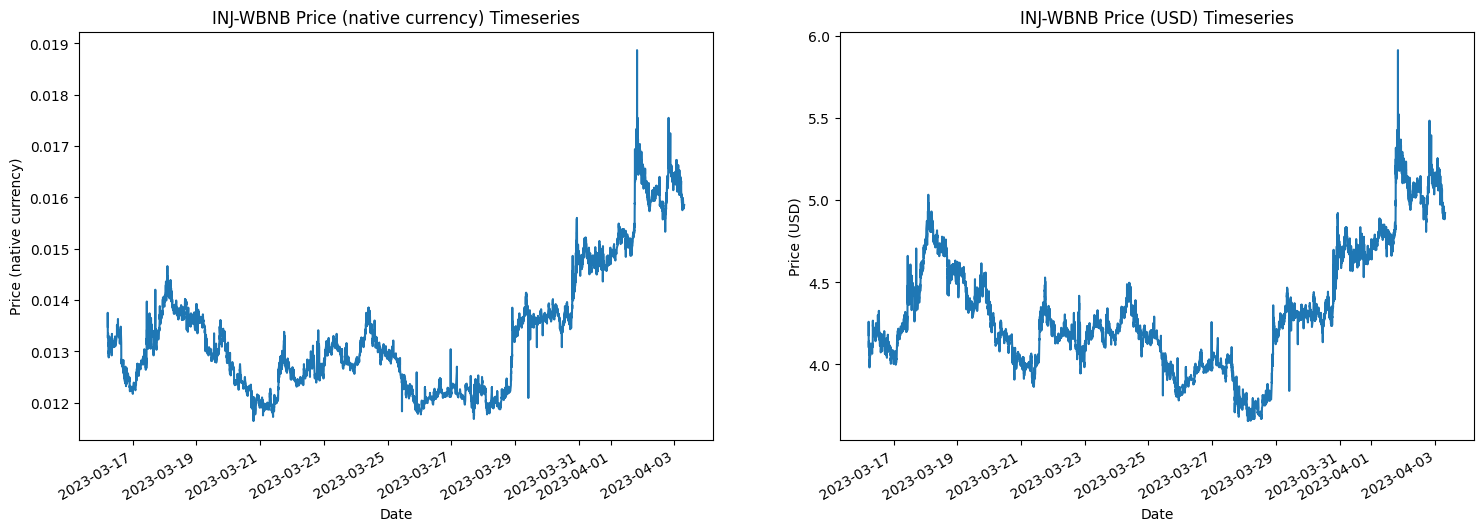

VOLT-WBNB


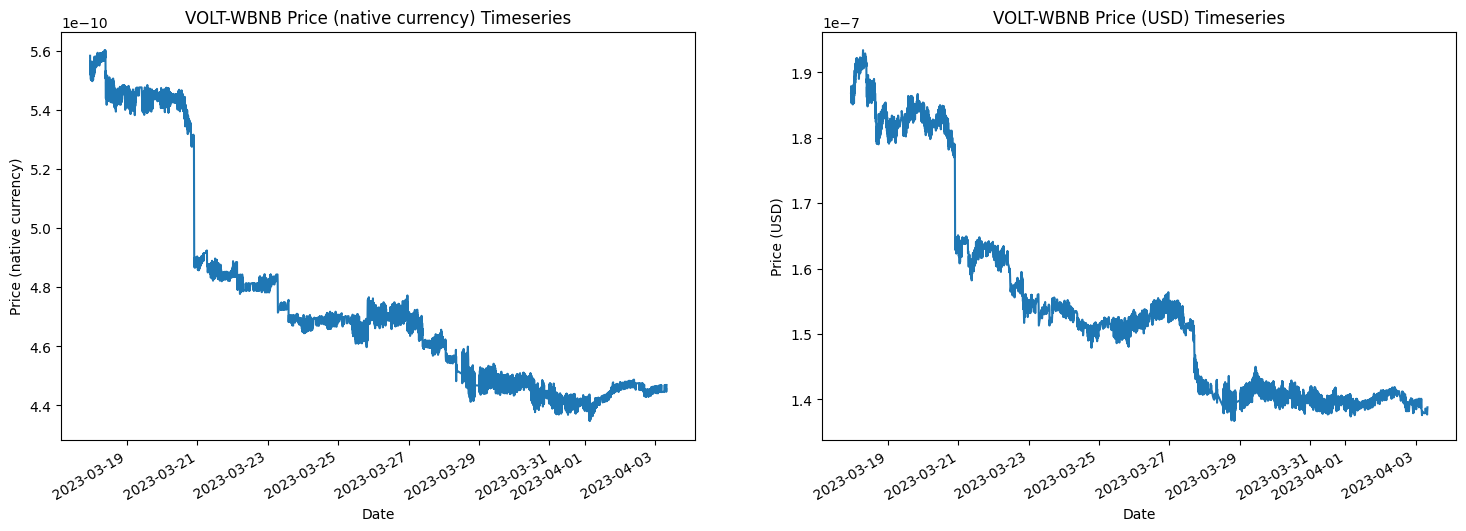

MBOX-WBNB


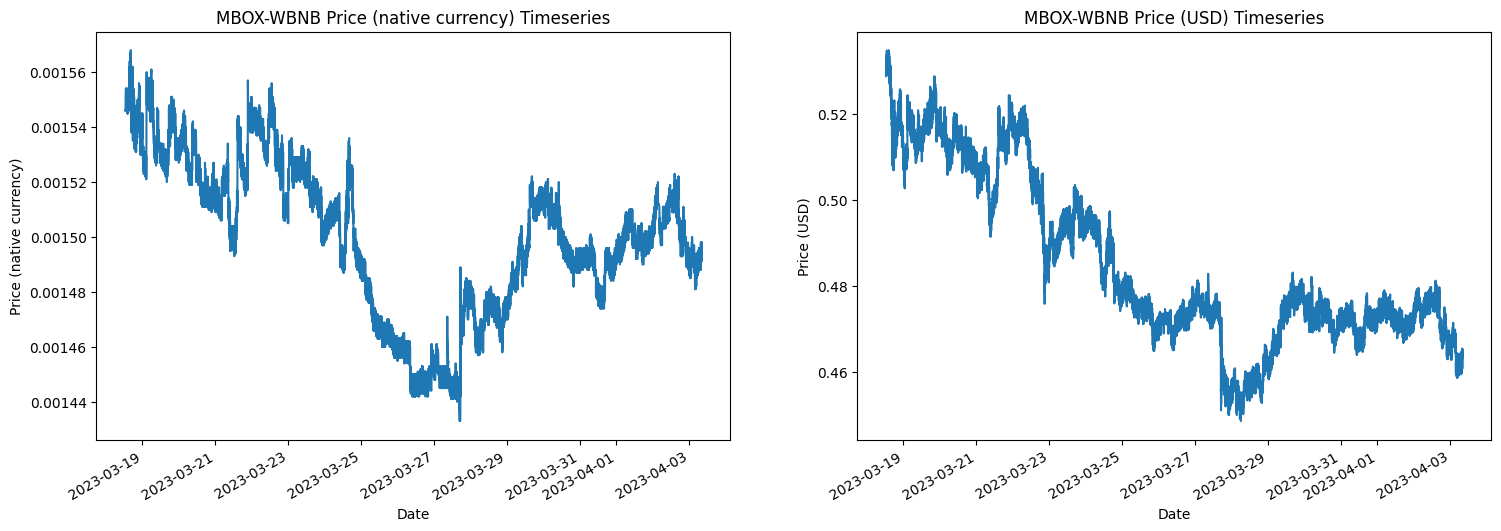

FLOKI-WBNB


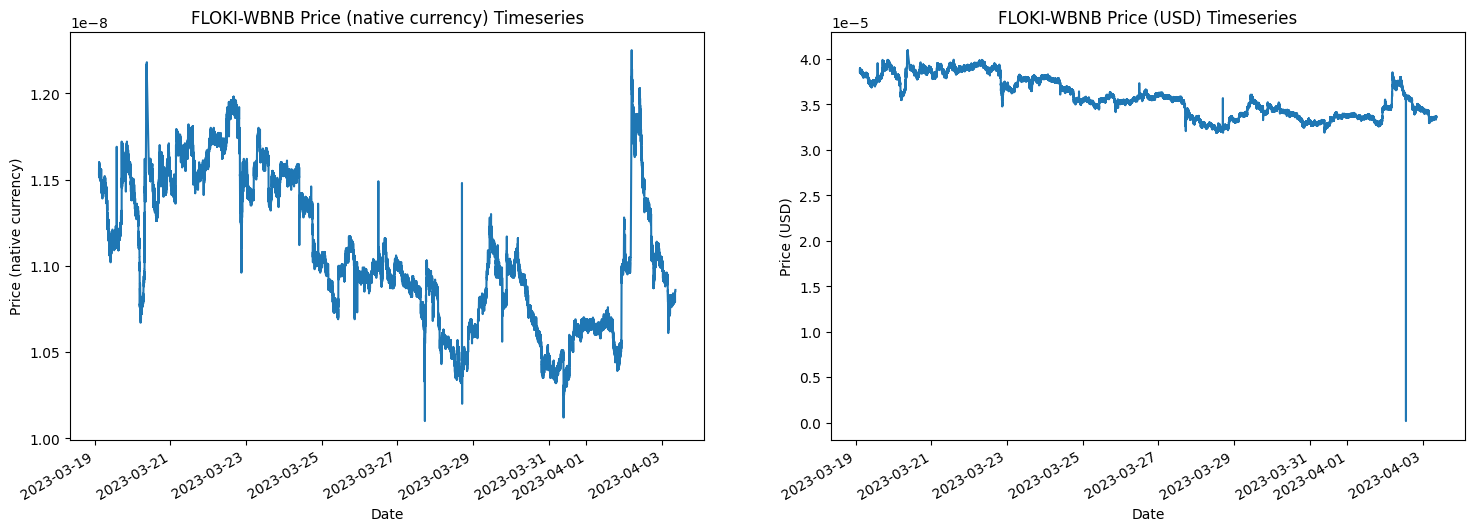

BabyDoge-WBNB


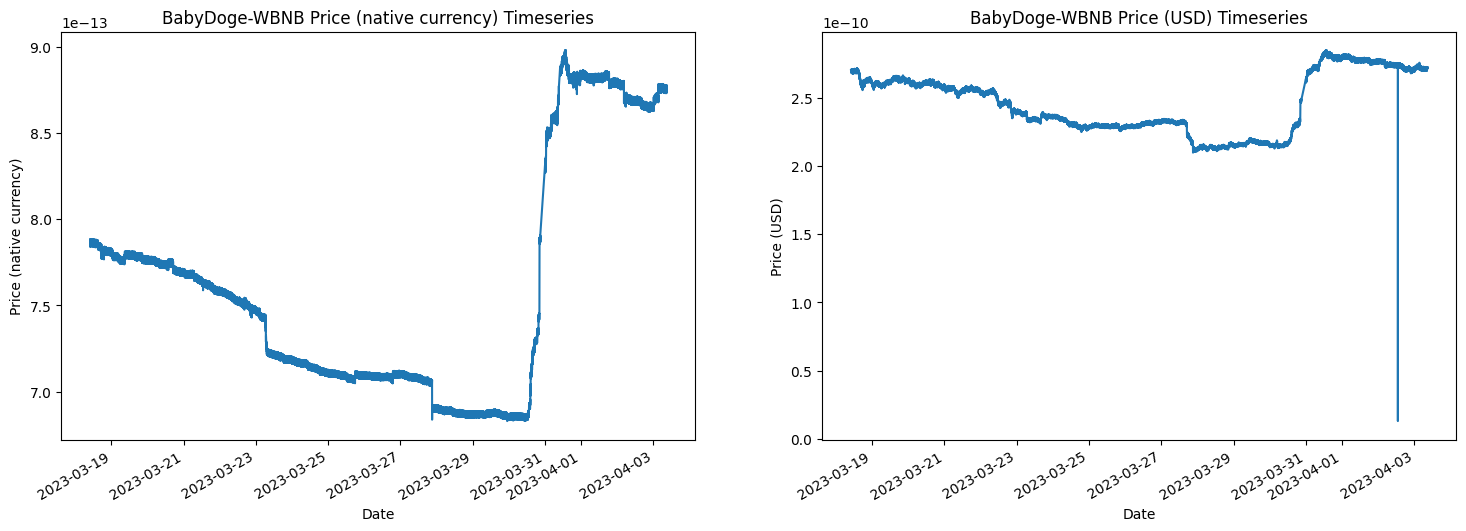

In [58]:
#loop through all 10 datasets
for pair in pair_list:
    #geting name of current pair and folder location
    name = pair[0]
    print(name)
    file_path = f"D:/Dokumenty/Vejška/Magisterské studium/DIPLOMKA/Code_and_Data/Data_scraping/DEX_data_scraper/complete_data/{name}/{name}_complete.csv"

    #loading data without werbose printout, seting index
    df = load_csv_to_df(file_path, verbose=False, name = name)
    set_index(df, info=False)

    #Plots
    plot_price(df, native=True, name=name, ax=None, plot_both=True)


    